<a href="https://colab.research.google.com/github/jaouni24/Reprocessing-for-Electric-Vehicle-Population-Dataset/blob/main/Assiment_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Opens a file dialog for upload


Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


The first step is to load the dataset into a DataFrame and ensure it has been loaded correctly by displaying a sample of the data using the `.head()` method from the pandas library.

In [ ]:
import pandas as pd
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with your filename
print(df.head())

   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible 

To gain a deeper understanding of the dataset, it is essential to explore its structure and characteristics. This includes identifying the existing features (columns), determining the number of rows, analyzing data types, and checking the number of non-null values in each feature. Such an overview helps assess data quality and guides further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

From the results of the `.info()` method, we can observe that some rows in our dataset contain missing values. To gain more insight, the following code displays the number of `NaN` values for each feature in the dataset.

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


We can observe missing values in several features, including County, city, Postal Code, Electric Range, Base MSRP, Legislative District, Vehicle Location, Electric Utility, and 2020 Census Tract. To calculate, display, and visualize the percentage of missing values relative to the total number of rows, use the following code:



Feature: County
Missing Rows: 4
Percentage: 0.00%

Feature: City
Missing Rows: 4
Percentage: 0.00%

Feature: Postal Code
Missing Rows: 4
Percentage: 0.00%

Feature: Electric Range
Missing Rows: 5
Percentage: 0.00%

Feature: Base MSRP
Missing Rows: 5
Percentage: 0.00%

Feature: Legislative District
Missing Rows: 445
Percentage: 0.21%

Feature: Vehicle Location
Missing Rows: 10
Percentage: 0.00%

Feature: Electric Utility
Missing Rows: 4
Percentage: 0.00%

Feature: 2020 Census Tract
Missing Rows: 4
Percentage: 0.00%



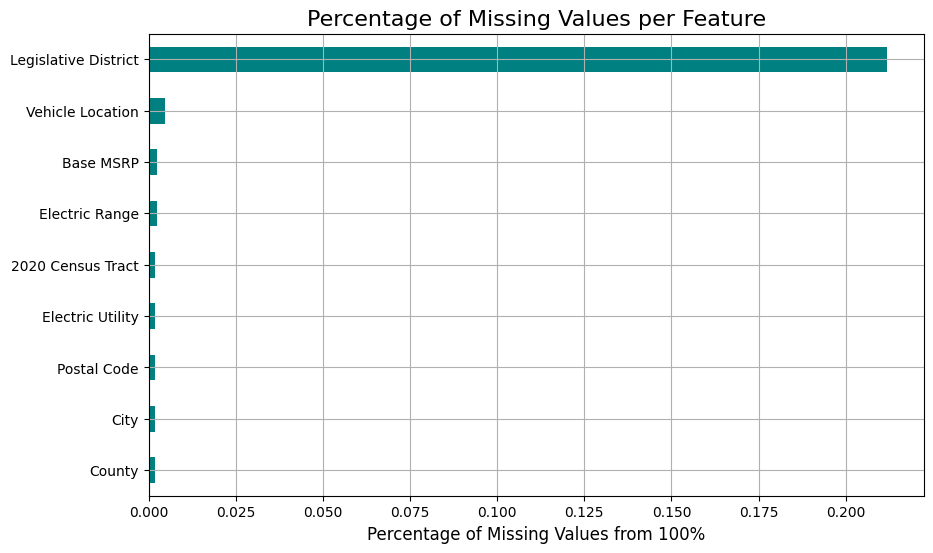

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing value counts and percentages
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Display the total missing rows and percentages for each feature with missing values
for feature in missing_counts[missing_counts > 0].index:
    missing_rows = missing_counts[feature]
    missing_percentage = missing_percentages[feature]
    print(f"Feature: {feature}")
    print(f"Missing Rows: {missing_rows}")
    print(f"Percentage: {missing_percentage:.2f}%\n")

# Filter out columns with no missing values for visualization
missing_percentages = missing_percentages[missing_percentages > 0]

# Plot the missing percentages as a horizontal bar chart
plt.figure(figsize=(10, 6))
missing_percentages.sort_values().plot(kind='barh', color='teal')
plt.xlabel('Percentage of Missing Values from 100%', fontsize=12)
plt.title('Percentage of Missing Values per Feature', fontsize=16)
plt.grid(True)
plt.show()



Based on the printed percentages and the graph, we can observe that the percentage of missing values for most features is almost zero. Therefore, we can safely drop these features without impacting the analysis. However, the feature "Legislative District" stands out with 445 missing rows, accounting for 0.21% of the dataset. Although this percentage is still small, we will attempt to fill these missing values. For the other features, since their missing values are negligible, filling them would have minimal effect, so we will drop them.

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


When we printed the information about the dataset, we observed that some features have missing values while others do not. As a result, there are no entirely empty rows in our dataset that need to be dropped. This means we can focus on addressing the specific features with missing values rather than eliminating entire rows from the dataset.

In [ ]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")

Number of empty records = 0


No empty records (rows) exits in the dataset. \\
To drop the rows containing missing values in all features except for "Legislative District," you can use the following code:

In [ ]:
df.dropna(subset=['County'], inplace=True)
df.dropna(subset=['Electric Range'], inplace=True)
df.dropna(subset=['Base MSRP'], inplace=True)
df.dropna(subset=['Vehicle Location'], inplace=True)
df.dropna(subset=['Postal Code'], inplace=True)
df.dropna(subset=['Electric Utility'], inplace=True)
df.dropna(subset=['2020 Census Tract'], inplace=True)
df.dropna(subset=['City'], inplace=True)

To check if the rows containing missing values have been successfully deleted, you can print the number of records with missing values for the specified features using the following code:

In [ ]:
# Print the number of records with missing values for each feature
print(f"The number of records where County is missing equals {df.isnull()['County'].sum()}")
print(f"The number of records where Electric Range is missing equals {df.isnull()['Electric Range'].sum()}")
print(f"The number of records where Base MSRP is missing equals {df.isnull()['Base MSRP'].sum()}")
print(f"The number of records where Vehicle Location is missing equals {df.isnull()['Vehicle Location'].sum()}")
print(f"The number of records where Postal Code is missing equals {df.isnull()['Postal Code'].sum()}")
print(f"The number of records where Electric Utility is missing equals {df.isnull()['Electric Utility'].sum()}")
print(f"The number of records where 2020 Census Tract is missing equals {df.isnull()['2020 Census Tract'].sum()}")
print(f"The number of records where City is missing equals {df.isnull()['City'].sum()}")

The number of records where County is missing equals 0
The number of records where Electric Range is missing equals 0
The number of records where Base MSRP is missing equals 0
The number of records where Vehicle Location is missing equals 0
The number of records where Postal Code is missing equals 0
The number of records where Electric Utility is missing equals 0
The number of records where 2020 Census Tract is missing equals 0
The number of records where City is missing equals 0


In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210150.000000,210150.000000,210150.000000,210150.000000,209709.000000,2.101500e+05,2.101500e+05
mean,98178.194647,2021.048670,50.602579,897.312039,28.930394,2.290765e+08,5.297929e+10
std,2445.491444,2.988946,86.974319,7652.606144,14.908422,7.115445e+07,1.551507e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948825e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405161e+08,5.303303e+10
75%,98373.000000,2023.000000,42.000000,0.000000,42.000000,2.629754e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


Notice that the descriptive statistics about for the updated features kept almost the same.

Sometimes, a single record may have multiple missing features, which means that the number of empty records for the "Legislative District" feature might remain unchanged or only be slightly reduced after the previous cleaning step. To check the number of rows that still contain a missing value for the "Legislative District" feature, use the following code:

In [ ]:
print(f"The number of records where Legislative District is missing equals {df.isnull()['Legislative District'].sum()}")
print(f"The proportion of records where Legislative District is missing equals {100*df.isnull()['Legislative District'].sum()/df.shape[0]}%")

The number of records where Legislative District is missing equals 441
The proportion of records where Legislative District is missing equals 0.20985010706638116%


The number of records containing missing values for the "Legislative District" feature has decreased from 445 to 441.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210150 non-null  object 
 1   County                                             210150 non-null  object 
 2   City                                               210150 non-null  object 
 3   State                                              210150 non-null  object 
 4   Postal Code                                        210150 non-null  float64
 5   Model Year                                         210150 non-null  int64  
 6   Make                                               210150 non-null  object 
 7   Model                                              210150 non-null  object 
 8   Electric Vehicle Type                              210150 non-null  object 
 9 

To fill the missing values in the "Legislative District" feature using the central tendency method, we first need to assess the skewness coefficient of the feature. This will help us understand its distribution, including the direction and extent of skewness. Afterward, we can visualize the distribution to gain further insights.

Skewness coefficient for Legislative District: -0.44


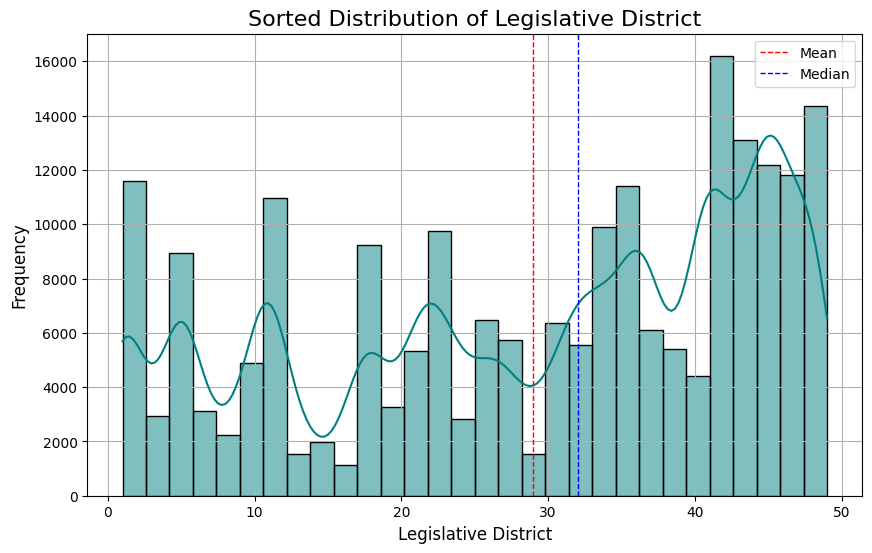

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness coefficient for the Legislative District feature
skewness = df['Legislative District'].skew()
print(f"Skewness coefficient for Legislative District: {skewness:.2f}")

# Sort the Legislative District feature for better visualization
sorted_legislative_district = df['Legislative District'].sort_values()

# Visualize the sorted distribution of the Legislative District feature
plt.figure(figsize=(10, 6))
sns.histplot(sorted_legislative_district, bins=30, kde=True, color='teal')
plt.title('Sorted Distribution of Legislative District', fontsize=16)
plt.xlabel('Legislative District', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['Legislative District'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Legislative District'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(True)
plt.show()


We can observe that the "Legislative District" feature is negatively skewed, as indicated by a skewness coefficient of -0.43. Additionally, since the median is higher than the mean, this further confirms the negative skewness. Given this distribution, a suitable approach for filling the missing values in the "Legislative District" feature would be to use the median.

In [ ]:
# Replace null values with the median of 'Legislative District'
median_value = df['Legislative District'].median()
df['Legislative District'].fillna(median_value, inplace=True)

# Dataset with 'Legislative District' nulls replaced by median (first 10 rows)
print("\nDataset with 'Legislative District' nulls replaced by median (first 10 rows):")
print(df.head(10))



Dataset with 'Legislative District' nulls replaced by median (first 10 rows):
   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   
5  3FA6P0PU5F  Snohomish    Bothell    WA      98012.0        2015     FORD   
6  5YJYGDEEXL       King     Renton    WA      98055.0        2020    TESLA   
7  5UXTS1C06M       King    Seattle    WA      98107.0        2021      BMW   
8  1N4AZ0CP0F       King   Bellevue    WA      98007.0        2015   NISSAN   
9  5YJSA1E20H       King    Seattle    WA      98125.0        2017    TESLA   

      Model                   Electric Vehicle Type

<ipython-input-44-521c7c64b7df>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legislative District'].fillna(median_value, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210150 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210150 non-null  object 
 1   County                                             210150 non-null  object 
 2   City                                               210150 non-null  object 
 3   State                                              210150 non-null  object 
 4   Postal Code                                        210150 non-null  float64
 5   Model Year                                         210150 non-null  int64  
 6   Make                                               210150 non-null  object 
 7   Model                                              210150 non-null  object 
 8   Electric Vehicle Type                              210150 non-null  object 
 9 

Notice that there is no null values in out dataframe.\\
Let's display again some descriptive statistics using df.describe() method.

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,2.101500e+05,2.101500e+05
mean,98178.194647,2021.048670,50.602579,897.312039,28.936836,2.290765e+08,5.297929e+10
std,2445.491444,2.988946,86.974319,7652.606144,14.893433,7.115445e+07,1.551507e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948825e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405161e+08,5.303303e+10
75%,98373.000000,2023.000000,42.000000,0.000000,42.000000,2.629754e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


As expected, the statistical information kept the same after filling the missing values.

In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['State'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 44


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Make'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 43


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Model'].nunique()
print(f"Number of distinct values in 'Model' column: {num_unique_makes}")


Number of distinct values in 'Model' column: 153


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Electric Vehicle Type'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 2


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 3


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Vehicle Location'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 931


In [ ]:
# Print the number of distinct (unique) values in the 'Make' column
num_unique_makes = df['Electric Utility'].nunique()
print(f"Number of distinct values in 'Make' column: {num_unique_makes}")


Number of distinct values in 'Make' column: 74


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# Load your dataset
#df = pd.read_csv('ev_data.csv')  # Replace with your actual dataset file

# Combine location columns into one address field for geocoding
df['full_address'] = df['County'] + ', ' + df['City'] + ', ' + df['State'] + ', ' + df['Postal Code'].astype(str)

# Initialize the geocoder with Nominatim
geolocator = Nominatim(user_agent="ev_visualization")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Adds a delay between requests to avoid overloading the server

# Geocode each unique location
df['location'] = df['full_address'].apply(geocode)
df['latitude'] = df['location'].apply(lambda loc: loc.latitude if loc else None)
df['longitude'] = df['location'].apply(lambda loc: loc.longitude if loc else None)

# Remove rows where geocoding failed (no coordinates)
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Aggregate EV counts by location (optional)
df['ev_count'] = 1  # If each row is an EV record, you can count the entries
location_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='ev_count')

# Create a base map centered around the middle of your data points
mean_lat = df['latitude'].mean()
mean_long = df['longitude'].mean()
m = folium.Map(location=[mean_lat, mean_long], zoom_start=6)

# Add circles to the map based on EV density
for idx, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['ev_count'] * 0.5,  # Adjust size scaling as needed
        color="blue",
        fill=True,
        fill_opacity=0.6,
        tooltip=f"EV Count: {row['ev_count']}"
    ).add_to(m)

# Save map as an HTML file
m.save('ev_distribution_map.html')
print("Map saved as 'ev_distribution_map.html'")


In [ ]:
# Import the necessary library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use dense array output

# Select the columns to be one-hot encoded
columns_to_encode = ['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Fit the encoder on the selected columns
enc.fit(df[columns_to_encode])

# Transform the selected columns into a one-hot encoded array
df_encoded = enc.transform(df[columns_to_encode])

# Get the one-hot encoded column names from the encoder
encoded_col_names = enc.get_feature_names_out(columns_to_encode)

# Convert the one-hot encoded array into a DataFrame with proper column names
df_encoded = pd.DataFrame(df_encoded, columns=encoded_col_names)

# Reset index to align with the original DataFrame (if needed)
df_encoded.index = df.index

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original columns that were one-hot encoded
df.drop(columns=columns_to_encode, inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())


   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0        X5            30.0        0.0                  35.0       267929112   
1   MODEL 3           215.0        0.0                  23.0       475911439   
2  PANAMERA            15.0        0.0                   1.0       101971278   
3   MODEL 3           215.0        0.0                  23.0       474363746   
4      LEAF           150.0        0.0                  45.0       476346482   

                  Vehicle Location  \
0  POI

In [ ]:
# Import the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to apply label encoding
columns_to_encode = ['Make', 'Model', 'Vehicle Location', 'Electric Utility','VIN (1-10)', 'County', 'City', 'State']

# Loop through each column and apply Label Encoding
for col in columns_to_encode:
    # Create a LabelEncoder instance
    le = LabelEncoder()

    # Fit and transform the column, and update it in the original DataFrame
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the updated DataFrame
print(df.head())


   VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0        3754      87   595     41      98380.0        2021     5    147   
1        3875      87   524     41      98370.0        2018    36     88   
2       10664     169    61     41      98012.0        2016    30    100   
3        3903      87    64     41      98310.0        2018    36     88   
4        1781      85   546     41      98052.0        2019    28     86   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0            30.0        0.0                  35.0       267929112   
1           215.0        0.0                  23.0       475911439   
2            15.0        0.0                   1.0       101971278   
3           215.0        0.0                  23.0       474363746   
4           150.0        0.0                  45.0       476346482   

   Vehicle Location  Electric Utility  2020 Census Tract  \
0               626                71       5.303509e+10   
1 

In [ ]:
df.describe()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
count,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000,2.101500e+05,210150.000000,210150.000000,2.101500e+05,210150.000000,210150.000000,210150.000000,210150.000000,210150.000000
mean,4826.838896,105.423902,417.539005,40.953034,98178.194647,2021.048670,27.020571,86.143926,50.602579,897.312039,28.930394,2.290765e+08,436.490169,59.338587,5.297929e+10,0.787766,0.212234,0.333224,0.564601,0.102175
std,2747.877114,45.054803,225.318824,1.210993,2445.491444,2.988946,12.037787,30.527526,86.974319,7652.606144,14.892771,7.115445e+07,112.078662,18.653909,1.551507e+09,0.408891,0.408891,0.471367,0.495810,0.302879
min,0.000000,0.000000,0.000000,0.000000,1731.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.469000e+03,0.000000,0.000000,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3136.000000,85.000000,215.000000,41.000000,98052.000000,2019.000000,16.000000,86.000000,0.000000,0.000000,17.000000,1.948825e+08,378.000000,55.000000,5.303301e+10,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4936.000000,85.000000,478.000000,41.000000,98125.000000,2022.000000,36.000000,89.000000,0.000000,0.000000,32.000000,2.405161e+08,437.000000,71.000000,5.303303e+10,1.000000,0.000000,0.000000,1.000000,0.000000
75%,5856.750000,135.000000,598.000000,41.000000,98373.000000,2023.000000,36.000000,92.000000,42.000000,0.000000,42.000000,2.629754e+08,496.000000,72.000000,5.305307e+10,1.000000,0.000000,1.000000,1.000000,0.000000
max,12372.000000,202.000000,757.000000,43.000000,99577.000000,2025.000000,42.000000,152.000000,337.000000,845000.000000,49.000000,4.792548e+08,930.000000,73.000000,5.602100e+10,1.000000,1.000000,1.000000,1.000000,1.000000
